In [264]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
data_path = "test_data_set.csv"

In [266]:
data_raw = pd.read_csv(data_path)

In [267]:
data_raw.shape

(949, 3)

In [268]:
df = data_raw[data_raw['Tags'].notnull()]

In [269]:
df.columns = ['title', 'tags', 'content']

In [270]:
df = df.drop(["title"], axis = 1)

In [271]:
def clean_tag(tag):
    tag = tag.lower().replace(" ", "")
    return tag
tags = []
contents = []
for _, row in df.iterrows():
    content = row.content
    for tag in row.tags.split(','):
        contents.append(content)
        tags.append(clean_tag(tag))
tag_to_content = pd.DataFrame({
    "tag": tags,
    "content": contents
})

In [210]:
tag_to_content

,tag,content
0,array,"Given an array of integers, return indices of ..."
1,hashtable,"Given an array of integers, return indices of ..."
2,linkedlist,You are given two non-empty linked lists repre...
3,math,You are given two non-empty linked lists repre...
4,hashtable,"Given a string, find the length of the longest..."
5,twopointers,"Given a string, find the length of the longest..."
6,string,"Given a string, find the length of the longest..."
7,array,There are two sorted arrays nums1 and nums2 of...
8,binarysearch,There are two sorted arrays nums1 and nums2 of...
9,divideandconquer,There are two sorted arrays nums1 and nums2 of...


In [272]:
tags = tag_to_content.tag.unique().tolist()

In [273]:
tags

['array',
 'hashtable',
 'linkedlist',
 'math',
 'twopointers',
 'string',
 'binarysearch',
 'divideandconquer',
 'dynamicprogramming',
 'backtracking',
 'stack',
 'heap',
 'greedy',
 'sort',
 'bitmanipulation',
 'stringdynamic',
 'programming',
 'tree',
 'depth-firstsearch',
 'breadth-firstsearch',
 'unionfind',
 'graph',
 'design',
 'sql',
 'bash',
 'topologicalsort',
 'trie',
 'binaryindexedtree',
 'segmenttree',
 'binarysearchtree',
 'hasttable',
 'recursion',
 'stacktree',
 'map',
 'breadthfirst-search',
 'brainteaser',
 'bread-firstsearch',
 'memoization',
 'depth-firstgraph',
 'queue',
 'minimax',
 'reservoirsampling',
 'dynamicprgramming',
 'random',
 'rejectionsampling',
 'geometry',
 'desgin',
 'recurrsion']

In [274]:
print(len(tags))

48


In [275]:
for tag in tags:
    tag_to_content[tag] = tag_to_content.tag.apply(lambda x: 1 if x == tag else 0)

In [276]:
tag_to_content

,tag,content,array,hashtable,linkedlist,math,twopointers,string,binarysearch,divideandconquer,...,depth-firstgraph,queue,minimax,reservoirsampling,dynamicprgramming,random,rejectionsampling,geometry,desgin,recurrsion
0,array,"Given an array of integers, return indices of ...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hashtable,"Given an array of integers, return indices of ...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,linkedlist,You are given two non-empty linked lists repre...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,math,You are given two non-empty linked lists repre...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hashtable,"Given a string, find the length of the longest...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,twopointers,"Given a string, find the length of the longest...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,string,"Given a string, find the length of the longest...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,array,There are two sorted arrays nums1 and nums2 of...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,binarysearch,There are two sorted arrays nums1 and nums2 of...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,divideandconquer,There are two sorted arrays nums1 and nums2 of...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


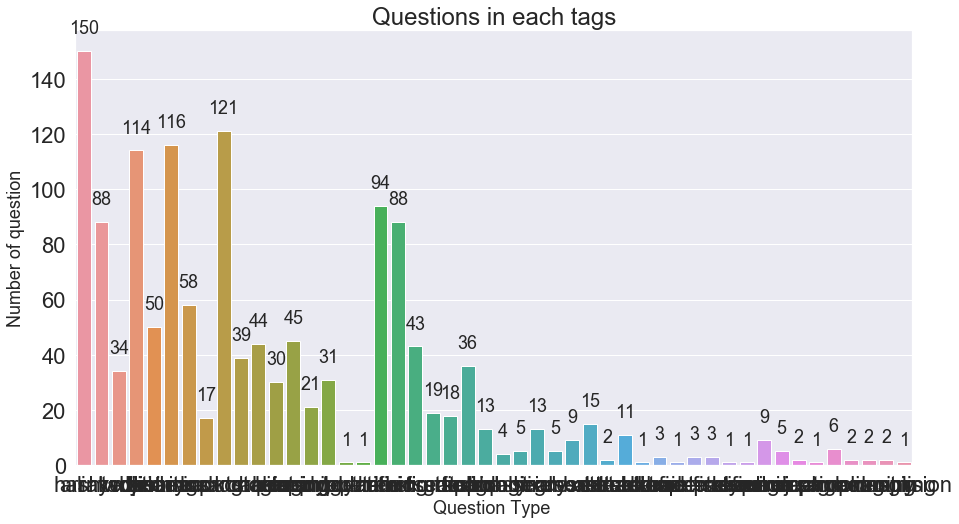

In [277]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(tags, tag_to_content.iloc[:,2:].sum().values)

plt.title("Questions in each tags", fontsize=24)
plt.ylabel('Number of question', fontsize=18)
plt.xlabel('Question Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = tag_to_content.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [218]:
#***No of questions with mulitple tags**

In [225]:
rowSums = tag_to_content.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

rowSums



0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
1372    1
1373    1
1374    1
1375    1
1376    1
1377    1
Length: 1378, dtype: int64

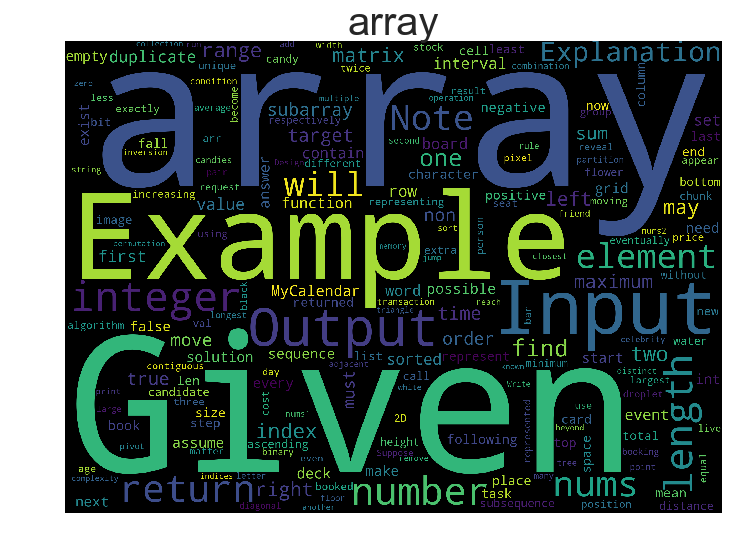

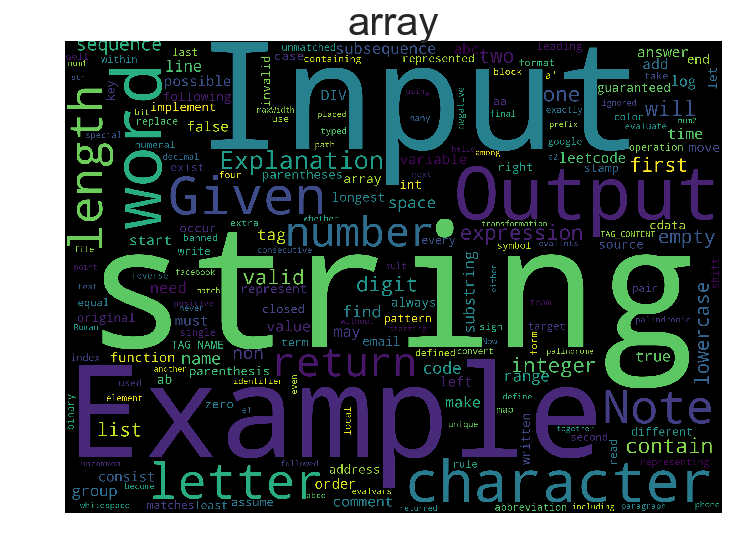

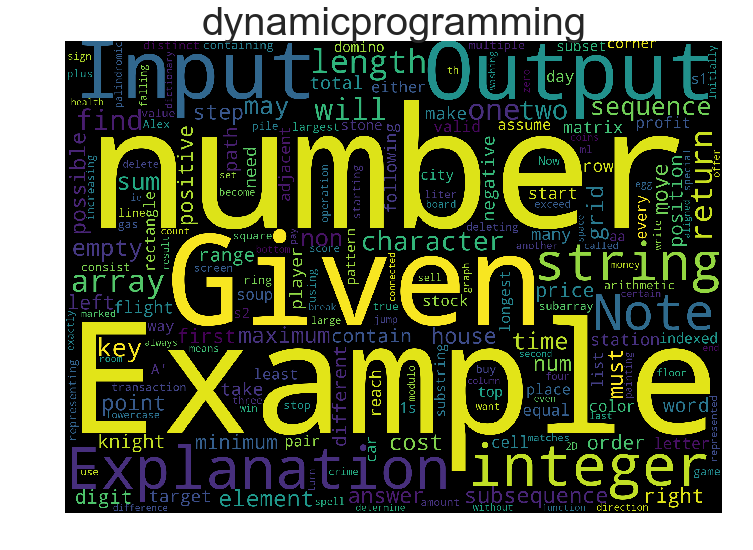

In [248]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# array
subset = tag_to_content[tag_to_content.array==1]
text = subset.content.values
array = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("array",fontsize=40)
plt.imshow(array)



plt.figure(figsize=(40,25))

# string
subset = tag_to_content[tag_to_content.string==1]
text = subset.content.values
string = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("array",fontsize=40)
plt.imshow(string)

#dynamicprogramming

plt.figure(figsize=(40,25))

# string
subset = tag_to_content[tag_to_content.dynamicprogramming==1]
text = subset.content.values
dynamicprogramming = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("dynamicprogramming",fontsize=40)
plt.imshow(dynamicprogramming)

In [278]:
#data preprocessing
data = tag_to_content
data = tag_to_content.loc[np.random.choice(tag_to_content.index, size=2000)]
data.shape


import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [279]:
#cleaning data

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    if isinstance(sentence, str):
        cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
        cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
        cleaned = cleaned.strip()
        cleaned = cleaned.replace("\n"," ")
        return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    if isinstance(sentence, str):
        for word in sentence.split():
            alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
            alpha_sent += alpha_word
            alpha_sent += " "
        alpha_sent = alpha_sent.strip()
        return alpha_sent

In [280]:
data['content'] = data['content'].str.lower()
data['content'] = data['content'].apply(cleanPunc)
data['content'] = data['content'].apply(keepAlpha)
data.head()

,tag,content,array,hashtable,linkedlist,math,twopointers,string,binarysearch,divideandconquer,...,depth-firstgraph,queue,minimax,reservoirsampling,dynamicprgramming,random,rejectionsampling,geometry,desgin,recurrsion
16,math,determine whether an integer is a palindrome a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,binarysearch,given a non empty binary search tree and a tar...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
755,random,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
773,dynamicprogramming,given an array of scores that are non negative...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,array,given a triangle find the minimum path sum fro...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [282]:
#removing stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    if isinstance(sentence, str):
        global re_stop_words
        return re_stop_words.sub(" ", sentence)

data['content'] = data['content'].apply(removeStopWords)
data.head()

,tag,content,array,hashtable,linkedlist,math,twopointers,string,binarysearch,divideandconquer,...,depth-firstgraph,queue,minimax,reservoirsampling,dynamicprgramming,random,rejectionsampling,geometry,desgin,recurrsion
16,math,determine whether integer palindrome integ...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,binarysearch,given non empty binary search tree target v...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
755,random,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
773,dynamicprogramming,given array scores non negative integers p...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,array,given triangle find minimum path sum top b...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [298]:
#stemming
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    if isinstance(sentence, str):
        for word in sentence.split():
            stem = stemmer.stem(word)
            stemSentence += stem
            stemSentence += " "
        stemSentence = stemSentence.strip()
        return stemSentence

data['content'] = data['content'].apply(stemming)
data.head()

,tag,content,array,hashtable,linkedlist,math,twopointers,string,binarysearch,divideandconquer,...,depth-firstgraph,queue,minimax,reservoirsampling,dynamicprgramming,random,rejectionsampling,geometry,desgin,recurrsion
16,math,determin whether integ palindrom integ palindr...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,binarysearch,given non empti binari search tree target valu...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
755,random,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
773,dynamicprogramming,given array score non negat integ player pick ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,array,given triangl find minimum path sum top bottom...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
data =  data.replace(to_replace='None', value=np.nan).dropna()

In [305]:
#train and split
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1392, 50)
(597, 50)


In [306]:
#tf-idf
train_text = train['content']
test_text = test['content']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [307]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['content'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['content'], axis=1)

In [308]:
#one vs rest
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [309]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for tag in tags:
    printmd('**Processing {} questions...**'.format(tag))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[tag])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[tag], prediction)))
    print("\n")

**Processing array questions...**

Test accuracy is 0.8877721943048577




**Processing hashtable questions...**

Test accuracy is 0.9564489112227805




**Processing linkedlist questions...**

Test accuracy is 0.9731993299832495




**Processing math questions...**

Test accuracy is 0.9296482412060302




**Processing twopointers questions...**

Test accuracy is 0.9731993299832495




**Processing string questions...**

Test accuracy is 0.9179229480737019




**Processing binarysearch questions...**

Test accuracy is 0.966499162479062




**Processing divideandconquer questions...**

Test accuracy is 0.981574539363484




**Processing dynamicprogramming questions...**

Test accuracy is 0.9078726968174204




**Processing backtracking questions...**

Test accuracy is 0.966499162479062




**Processing stack questions...**

Test accuracy is 0.9731993299832495




**Processing heap questions...**

Test accuracy is 0.9681742043551089




**Processing greedy questions...**

Test accuracy is 0.9698492462311558




**Processing sort questions...**

Test accuracy is 0.9715242881072027




**Processing bitmanipulation questions...**

Test accuracy is 0.9731993299832495




**Processing stringdynamic questions...**

Test accuracy is 0.998324958123953




**Processing programming questions...**

Test accuracy is 1.0




**Processing tree questions...**

Test accuracy is 0.932998324958124




**Processing depth-firstsearch questions...**

Test accuracy is 0.9463986599664992




**Processing breadth-firstsearch questions...**

Test accuracy is 0.9782244556113903




**Processing unionfind questions...**

Test accuracy is 0.9865996649916248




**Processing graph questions...**

Test accuracy is 0.981574539363484




**Processing design questions...**

Test accuracy is 0.9715242881072027




**Processing sql questions...**

Test accuracy is 0.9916247906197655




**Processing bash questions...**

Test accuracy is 0.9966499162479062




**Processing topologicalsort questions...**

Test accuracy is 0.9916247906197655




**Processing trie questions...**

Test accuracy is 0.9865996649916248




**Processing binaryindexedtree questions...**

Test accuracy is 0.998324958123953




**Processing segmenttree questions...**

Test accuracy is 0.9949748743718593




**Processing binarysearchtree questions...**

Test accuracy is 0.9916247906197655




**Processing hasttable questions...**

Test accuracy is 1.0




**Processing recursion questions...**

Test accuracy is 0.9882747068676717




**Processing stacktree questions...**

Test accuracy is 0.9966499162479062




**Processing map questions...**

Test accuracy is 1.0




**Processing breadthfirst-search questions...**

Test accuracy is 1.0




**Processing brainteaser questions...**

Test accuracy is 0.998324958123953




**Processing bread-firstsearch questions...**

Test accuracy is 0.9966499162479062




**Processing memoization questions...**

Test accuracy is 0.998324958123953




**Processing depth-firstgraph questions...**

Test accuracy is 1.0




**Processing queue questions...**

Test accuracy is 0.9882747068676717




**Processing minimax questions...**

Test accuracy is 1.0




**Processing reservoirsampling questions...**

Test accuracy is 0.9966499162479062




**Processing dynamicprgramming questions...**

Test accuracy is 1.0




**Processing random questions...**

Test accuracy is 0.998324958123953




**Processing rejectionsampling questions...**

Test accuracy is 1.0




**Processing geometry questions...**

Test accuracy is 0.998324958123953




**Processing desgin questions...**

Test accuracy is 0.998324958123953




**Processing recurrsion questions...**

Test accuracy is 1.0


CPU times: user 444 ms, sys: 226 ms, total: 670 ms
Wall time: 7.04 s


In [311]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [312]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

TypeError: no supported conversion for types: (dtype('O'),)